In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
from qgis.core import *

In [5]:
# 查看可用的所有QGIS功能
from processing.core.Processing import Processing
from qgis.analysis import QgsNativeAlgorithms

Processing.initialize()

QgsApplication.processingRegistry().addProvider(QgsNativeAlgorithms())
for alg in QgsApplication.processingRegistry().algorithms():
        print(alg.id(), "中的", alg.displayName(), '可用！')

gdal:aspect 中的 Aspect 可用！
gdal:assignprojection 中的 Assign projection 可用！
gdal:buffervectors 中的 Buffer vectors 可用！
gdal:buildvirtualraster 中的 Build virtual raster 可用！
gdal:buildvirtualvector 中的 Build virtual vector 可用！
gdal:cliprasterbyextent 中的 Clip raster by extent 可用！
gdal:cliprasterbymasklayer 中的 Clip raster by mask layer 可用！
gdal:clipvectorbyextent 中的 Clip vector by extent 可用！
gdal:clipvectorbypolygon 中的 Clip vector by mask layer 可用！
gdal:colorrelief 中的 Color relief 可用！
gdal:contour 中的 Contour 可用！
gdal:convertformat 中的 Convert format 可用！
gdal:dissolve 中的 Dissolve 可用！
gdal:executesql 中的 Execute SQL 可用！
gdal:extractprojection 中的 Extract projection 可用！
gdal:fillnodata 中的 Fill nodata 可用！
gdal:gdal2tiles 中的 gdal2tiles 可用！
gdal:gdal2xyz 中的 gdal2xyz 可用！
gdal:gdalinfo 中的 Raster information 可用！
gdal:gridaverage 中的 Grid (Moving average) 可用！
gdal:griddatametrics 中的 Grid (Data metrics) 可用！
gdal:gridinversedistance 中的 Grid (Inverse distance to a power) 可用！
gdal:gridinversedistancenearestneighbo

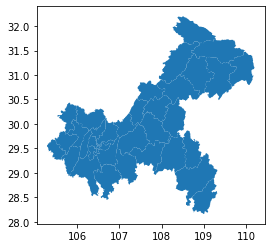

In [6]:
import geopandas as gpd

gpd.read_file('重庆市.geojson').plot();

In [8]:
from processing import algorithmHelp

# 查看渔网创建工具的说明文档
algorithmHelp("native:creategrid")

Create grid (native:creategrid)

This algorithm creates a vector layer with a grid covering a given extent. Elements in the grid can be points, lines or polygons. The size and/or placement of each element in the grid is defined using a horizontal and vertical spacing. The CRS of the output layer must be defined. The grid extent and the spacing values must be expressed in the coordinates and units of this CRS. The top-left point (minX, maxY) is used as the reference point. That means that, at that point, an element is guaranteed to be placed. Unless the width and height of the selected extent is a multiple of the selected spacing, that is not true for the other points that define that extent.


----------------
Input parameters
----------------

TYPE: Grid type

	Parameter type:	QgsProcessingParameterEnum

	Available values:
		- 0: Point
		- 1: Line
		- 2: Rectangle (Polygon)
		- 3: Diamond (Polygon)
		- 4: Hexagon (Polygon)

	Accepted data types:
		- int
		- str: as string representati

In [9]:
from processing import run

chongqing = gpd.read_file('重庆市.geojson')

# 获取投影坐标系下的bbox信息
total_bounds = chongqing.to_crs('EPSG:2381').total_bounds

params = {
    'TYPE': 2,
    'EXTENT': f'{total_bounds[0]},{total_bounds[2]},{total_bounds[1]},{total_bounds[3]}',
    'HSPACING': 10000,
    'VSPACING': 10000,
    'HOVERLAY': 0,
    'VOVERLAY': 0,
    'CRS': 'EPSG:2381',
    'OUTPUT': '重庆10000x10000渔网测试.geojson' # 导出到外部GeoJSON文件
}

feedback = QgsProcessingFeedback()
run("native:creategrid", params, feedback=feedback)

{'OUTPUT': '重庆10000x10000渔网测试.geojson'}

In [10]:
gpd.read_file('重庆10000x10000渔网测试.geojson').crs

<Projected CRS: EPSG:2381>
Name: Xian 1980 / 3-degree Gauss-Kruger CM 108E
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: China - 106.5°E to 109.5°E onshore
- bounds: (106.5, 18.19, 109.51, 42.47)
Coordinate Operation:
- name: 3-degree Gauss-Kruger CM 108E
- method: Transverse Mercator
Datum: Xian 1980
- Ellipsoid: IAG 1975
- Prime Meridian: Greenwich